In [4]:
import os
import sys
sys.path.append("./../")
import numpy as np
import matplotlib.pyplot as plt
import pdb
import pandas as pd
import yaml
import h5py
import vicon_imu_data_process.process_landing_data as pro_rd
import estimation_assessment.scores as es_as

import seaborn as sns
import copy
import re
import json

from vicon_imu_data_process.const import FEATURES_FIELDS, LABELS_FIELDS, DATA_PATH
from vicon_imu_data_process.const import DROPLANDING_PERIOD, RESULTS_PATH
from vicon_imu_data_process import const
from vicon_imu_data_process.dataset import *

from estimation_models.rnn_models import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
import time as localtimepkg

from estimation_study import *
from estimation_assessment.visualization import *
#import pdb
import re

tensorflow version: 2.5.0
tensorflow version: 2.5.0
[LogicalDevice(name='/device:CPU:0', device_type='CPU')] []


In [11]:
combination_investigation_results = [
                                     "/home/sun/drop_landing_workspace/results/training_testing/model_comparison/baseline_v4/testing_result_folders.txt",
                                     "/home/sun/drop_landing_workspace/results/training_testing/data_augmentation/2_5d_imu_augment/testing_result_folders.txt",
                                     #"/home/sun/drop_landing_workspace/results/training_testing/model_comparison/baseline_v5/testing_result_folders.txt",
                                     "/home/sun/drop_landing_workspace/results/training_testing/model_comparison/finetuning_v2/testing_result_folders.txt",
                                     "/home/sun/drop_landing_workspace/results/training_testing/model_comparison/normal_dann_v2/testing_result_folders.txt",
                                     "/home/sun/drop_landing_workspace/results/training_testing/model_comparison/repeated_dann_v2/testing_result_folders.txt",
                                     #"/home/sun/drop_landing_workspace/results/training_testing/model_comparison/aug_dann_v2/testing_result_folders.txt",
                                     "/home/sun/drop_landing_workspace/results/training_testing/model_comparison/aug_dann_v4/testing_result_folders.txt",
                                     "/home/sun/drop_landing_workspace/results/training_testing/model_comparison/aug_dann_v5/testing_result_folders.txt",
                                     "/home/sun/drop_landing_workspace/results/training_testing/model_comparison/aug_dann_v6/testing_result_folders.txt",
                                     "/home/sun/drop_landing_workspace/results/training_testing/model_comparison/aug_dann_v7/testing_result_folders.txt",
                                     "/home/sun/drop_landing_workspace/results/training_testing/model_comparison/aug_dann_v8/testing_result_folders.txt",
                                     "/home/sun/drop_landing_workspace/results/training_testing/model_comparison/aug_dann_v9/testing_result_folders.txt",
                                    ]
'''
combination_investigation_results = [
                                     "/home/sun/drop_landing_workspace/results/training_testing/model_comparison/baseline_v4/testing_result_folders.txt",
                                     "/home/sun/drop_landing_workspace/results/training_testing/data_augmentation/2_5d_imu_augment/testing_result_folders.txt",
                                     "/home/sun/drop_landing_workspace/results/training_testing/data_augmentation/5d_imu_augment/testing_result_folders.txt",
                                     "/home/sun/drop_landing_workspace/results/training_testing/data_augmentation/7_5d_imu_augment/testing_result_folders.txt",
                                     "/home/sun/drop_landing_workspace/results/training_testing/data_augmentation/10d_imu_augment/testing_result_folders.txt",
                                     "/home/sun/drop_landing_workspace/results/training_testing/data_augmentation/12_5d_imu_augment/testing_result_folders.txt",
                                     "/home/sun/drop_landing_workspace/results/training_testing/data_augmentation/15d_imu_augment/testing_result_folders.txt",
                                    ]
'''

combination_investigation_results = [
                                     "/home/sun/drop_landing_workspace/results/training_testing/model_comparison/baseline_v4/testing_result_folders.txt",
                                     "/home/sun/drop_landing_workspace/results/training_testing/model_comparison/aug_dann_v8/testing_result_folders.txt",
                                     "/home/sun/drop_landing_workspace/results/training_testing/model_comparison/aug_dann_v10/testing_result_folders.txt",
                                     "/home/sun/drop_landing_workspace/results/training_testing/model_comparison/2_5d_imu_augment_v1/testing_result_folders.txt",
                                     "/home/sun/drop_landing_workspace/results/training_testing/model_comparison/2_5d_imu_augment_v2/testing_result_folders.txt",
                                     "/home/sun/drop_landing_workspace/results/training_testing/baseline_v6/testing_result_folders.txt",
                                    ]


combination_investigation_results = [
                                     "/home/sun/drop_landing_workspace/results/training_testing/model_comparison/baseline_v4/testing_result_folders.txt",
                                     "/home/sun/drop_landing_workspace/results/training_testing/model_comparison/aug_dann_v8/testing_result_folders.txt",
                                     "/home/sun/drop_landing_workspace/results/training_testing/baseline_v6/testing_result_folders.txt",
                                     "/home/sun/drop_landing_workspace/results/training_testing/baseline_v7/testing_result_folders.txt",
                                     "/home/sun/drop_landing_workspace/results/training_testing/baseline_v8/testing_result_folders.txt",
                                     "/home/sun/drop_landing_workspace/results/training_testing/baseline_v9/testing_result_folders.txt",
                                     "/home/sun/drop_landing_workspace/results/training_testing/baseline_v10/testing_result_folders.txt",
                                     "/home/sun/drop_landing_workspace/results/training_testing/baseline_v11/testing_result_folders.txt",
                                     "/home/sun/drop_landing_workspace/results/training_testing/baseline_v12/testing_result_folders.txt",
                                     "/home/sun/drop_landing_workspace/results/training_testing/repeated_dann_v3/testing_result_folders.txt",
                                    ]
combination_investigation_results = [
                                     "/home/sun/drop_landing_workspace/results/training_testing/investigation/repeated_dann_v4/testing_result_folders.txt",
                                     "/home/sun/drop_landing_workspace/results/training_testing/investigation/baseline_v14/testing_result_folders.txt",
                                    ]
#combination_investigation_results =combination_investigation_results[]
metrics = get_list_investigation_metrics(combination_investigation_results[1])
combination_investigation_metrics = [os.path.join(os.path.dirname(folder),"metrics.csv") for folder in combination_investigation_results]

/home/sun/drop_landing_workspace/results/training_testing/investigation/baseline_v14/testing_result_folders.txt


/home/sun/drop_landing_workspace/results/training_testing/investigation/repeated_dann_v4/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation/baseline_v14/metrics.csv
DROP R2 cases below :0.0


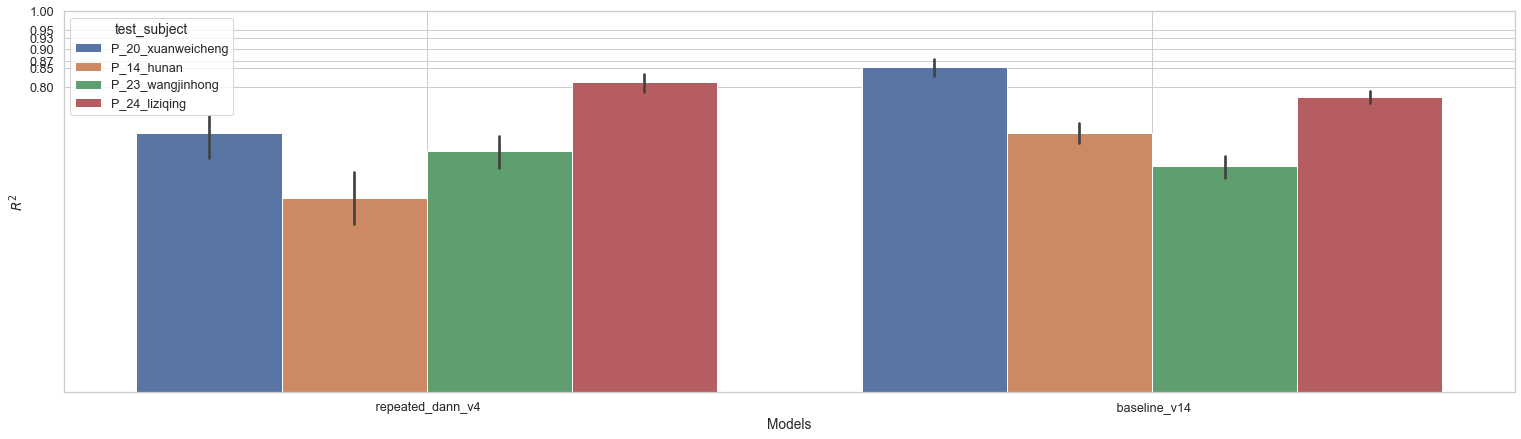

In [14]:
# Plot metrics

subjects_ids_names = ['P_08_zhangboyuan', 'P_10_dongxuan', 'P_11_liuchunyu', 'P_13_xulibang', 'P_14_hunan', 'P_15_liuzhaoyu', 'P_16_zhangjinduo', 'P_17_congyuanqi', 'P_18_hezhonghai', 'P_19_xiongyihui', 'P_20_xuanweicheng', 'P_21_wujianing', 'P_22_zhangning', 'P_23_wangjinhong', 'P_24_liziqing']
#subjects_ids_names.remove('P_19_xiongyihui')

filters={'drop_value':0.4,'sort_variable':'r2','test_subject':subjects_ids_names}
filters={'drop_value':0.0,'sort_variable':'r2'}
#filters={'sort_variable':'r2'}
metrics = parase_list_investigation_metrics(combination_investigation_metrics,**filters)

metrics.rename(columns = {'alias_name':'Model name'}, inplace = True)
replace_map = {' baseline_v4': 'Baseline', ' finetuning': 'Fine-tuning', ' aug_dann_v5': 'Augmentation DANN',
               ' repeated_dann_v2': 'Non-augmentation DANN', ' 2_5d_imu_augment': 'IMU augmentation',
              ' normal_dann_v2': 'Normal DANN'}
metrics.replace(replace_map, inplace=True)



x='Model name'; y = 'r2';hue='test_subject'
#displayed_data = metrics.loc[metrics['Sensor configurations'].isin(imu_config)]
hue_plot_params = {
    'data': metrics,
    'x': x,
    'y': y,
    'hue':hue,
    #"showfliers": False,
    #"showmeans": True
    }

g = sns.barplot(**hue_plot_params)
g.set_xlabel('Models')
g.set_ylabel('$R^2$')
#g.set_ylim(0.4,1.0)
#g.set_yticks([0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1.0])
g.set_yticks([0.8, 0.85, 0.87, 0.9, 0.93, 0.95, 1.0])
g.grid(visible=True, axis='both',which='major')


    
if False:
    test_method="t-test_ind"
    pairs = (
        [('Baseline','IMU augmentation'),('IMU augmentation','Fine-tuning'),('Non-augmentation DANN','Augmentation DANN'), ('Baseline', 'Augmentation DANN')]
        )
    pairs = (
        [(' baseline_v7',' aug_dann_v8')]
        )
    annotator=Annotator(g, pairs=pairs,**hue_plot_params)
    annotator.configure(test=test_method, text_format='star', loc='inside')
    annotator.apply_and_annotate()


fig=g.get_figure()
fig.set_figwidth(26); fig.set_figheight(7)
#save_figure("/home/sun/drop_landing_workspace/results/training_testing/model_comparison/",'model_comparison','pdf')


In [15]:
# List metrics 
#metrics= metrics.round(2)
metrics[['r2','Model name']].groupby('Model name').describe().round(2)

r2                                          
                   count  mean   std   min   25%   50%   75%   max
Model name                                                        
 baseline_v14      230.0  0.73  0.13  0.12  0.64  0.73  0.82  0.96
 repeated_dann_v4  112.0  0.67  0.17  0.04  0.61  0.70  0.80  0.93

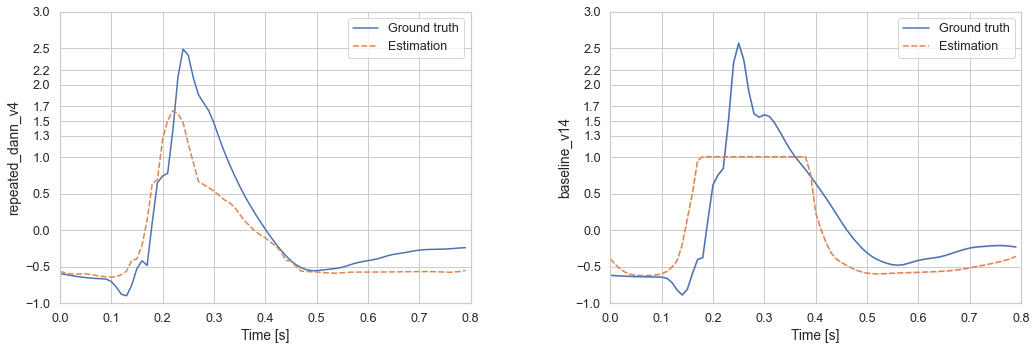

In [18]:
# Plot estimation results
selection=len(combination_investigation_results)*[{'child_test_id':['test_26'], 'test_subject': ['P_23_wangjinhong']}]
#selection=len(combination_investigation_results)*[{ 'test_subject': ['P_23_wangjinhong']}]
figpath, multi_model_results = p6plot_statistic_actual_estimation_curves(combination_investigation_results,selection, col_wrap=2,figsize=(15,5))

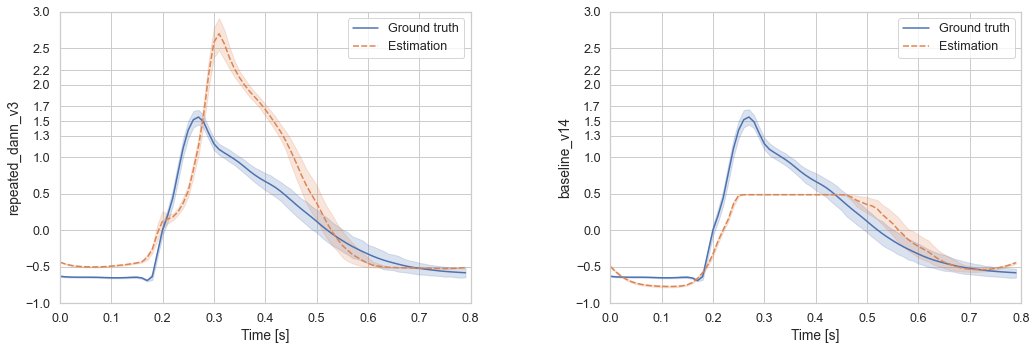

In [9]:

# Plot estimation results
selection=len(combination_investigation_results)*[{'child_test_id':['test_2'], 'test_subject': ['P_23_wangjinhong']}]
selection=len(combination_investigation_results)*[{ 'test_subject': ['P_14_hunan']}]
figpath, multi_model_results = p6plot_statistic_actual_estimation_curves(combination_investigation_results,selection, col_wrap=2,figsize=(15,5))

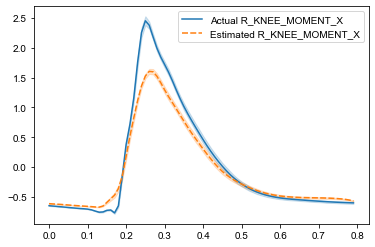

(0.841, 0.399, 0.242, 0.058)

In [77]:
# plot curves

selection={'parent_test_id': ['test_114836'],'child_test_id':['test_10']}
selection={}
test_results = get_multi_models_test_results([combination_investigation_results[-]], **selection)
sns.lineplot(data=test_results[0])
plt.show()
es_as.calculate_scores(test_results[0]['Actual R_KNEE_MOMENT_X'],test_results[0]['Estimated R_KNEE_MOMENT_X'])

In [ ]:
selection={'parent_test_id': ['test_161724'], 'child_test_id': ['test_1']}
test_results = get_multi_models_test_results([combination_investigation_results[1]], **selection)
sns.lineplot(data=test_results[0])
plt.show()
es_as.calculate_scores(test_results[0]['Actual R_KNEE_MOMENT_X'],test_results[0]['Estimated R_KNEE_MOMENT_X'])

In [ ]:
test_results[0].index

In [ ]:

plot_statistic_actual_estimation_curves(a_testing_training_folder,selection)

In [ ]:
sns.lineplot(data=test_results[0])

In [70]:
# calculate landing trials and walking steps

datafile_path = os.path.join('/home/sun/drop_landing_workspace/data','kam_norm_walking_data.hdf5')

subjects_trials_dataset = pro_rd.load_subjects_dataset(h5_file_name = datafile_path)

subjects_trials_len = {subject_id_name: len(list(trials.keys())) for subject_id_name, trials in subjects_trials_dataset.items()}
print(subjects_trials_len)
sum_len=0
for key, value in subjects_trials_len.items():
    sum_len+=value
    
print(sum_len)

{'subject_01': 867, 'subject_02': 868, 'subject_03': 611, 'subject_04': 851, 'subject_05': 919, 'subject_06': 836, 'subject_07': 722, 'subject_08': 766, 'subject_09': 867, 'subject_10': 699, 'subject_11': 671, 'subject_12': 816, 'subject_13': 752, 'subject_14': 692, 'subject_15': 778, 'subject_16': 790, 'subject_17': 807}
13312


In [ ]:
import torch,torchvision
import torch.nn as nn
 
net = nn.Sequential(
    nn.Conv1d(1, 32, 3),nn.ReLU(),nn.MaxPool2d(2,2),
#     nn.Linear(?, 4096),nn.ReLU(),
#     nn.Linear(4096,10)
)
 
train_data = torchvision.datasets.MNIST('./data', train=True, transform=torchvision.transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_data, batch_size=128, shuffle=True)
 
for data, target in train_loader:
    output = net(data)
    print(output.size())